# GROUP PROJECT-ECONOMY EFFECT
## Introduction: In order to analyse the impact of the covid-19 on the economy, I analyse gross domestic product by industry from 2020 to 2022. I use two csv table, they are quarterly values of GDP and quarterly percentage changes of GDP
### Data Sources：https://www.stats.govt.nz/information-releases/gross-domestic-product-june-2022-quarter/
### Group member: PEI(Perry) LI

**Comments: The library I used.**

In [ ]:
library(tidyverse)
library(readr)
library("zoo")
library(ggplot2)
library(patchwork)

**Comments: analyse quarterly values**

1. Read the first table about GDP quarterly values

In [ ]:
gdp_df <- read.csv('GDP_quarterly_values.csv')
head(gdp_df)

,Year,X,Month,Agriculture,X.1,Forestry.and.logging,X.2,Fishing..aquaculture.and.agriculture..forestry.and.fishing.support.services,X.3,Mining,...,Health.care.and.social.assistance,X.30,Arts.and.recreation.services,X.31,Other.services,X.32,Unallocated.industries,X.33,Gross.domestic.product,X.34
,<int>,<lgl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,...,<chr>,<chr>,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1987,NA,Jun,"1,594",,120,,201,,536,...,"1,284",,319,NA,473,,"1,789",,"28,008",
2,NA,NA,Sep,"1,654",,136,,200,,452,...,"1,280",,328,NA,467,,"1,745",,"28,160",
3,NA,NA,Dec,"1,733",,134,,207,,647,...,"1,283",,341,NA,472,,"1,844",,"28,290",
4,1988,NA,Mar,"1,767",,129,,201,,665,...,"1,266",,342,NA,465,,"1,722",,"28,181",
5,NA,NA,Jun,"1,698",,149,,231,,624,...,"1,315",,335,NA,450,,"1,704",,"28,047",
6,NA,NA,Sep,"1,630",,155,,241,,588,...,"1,325",,317,NA,455,,"1,724",,"28,111",


2.Show the detail of the first table

In [ ]:
glimpse(gdp_df)

Rows: 141
Columns: 71
$ Year                                                                        <int> ~
$ X                                                                           <lgl> ~
$ Month                                                                       <chr> ~
$ Agriculture                                                                 <chr> ~
$ X.1                                                                         <chr> ~
$ Forestry.and.logging                                                        <int> ~
$ X.2                                                                         <chr> ~
$ Fishing..aquaculture.and.agriculture..forestry.and.fishing.support.services <int> ~
$ X.3                                                                         <chr> ~
$ Mining                                                                      <chr> ~
$ X.4                                                                         <chr> ~
$ Food..beverage..and.tobacco.ma

3.Only show records from 2020 to 2022, remove unnecessary columns to make the table look cleaner.

In [ ]:
gdp_year <- gdp_df %>%
slice(132:141) %>% #choose row from 2020 to 2022
select(-X, -X.1, -X.2, -X.3, -X.4, -X.5, -X.6, -X.7, -X.8, -X.9, -X.10, -X.11, -X.12, -X.13, -X.14, -X.15, -X.16, -X.17, -X.18, -X.19, -X.20, -X.21, -X.22, -X.23, -X.24, -X.25, -X.26, -X.27, -X.28, -X.29, -X.30, -X.31, -X.32, -X.33, -X.34)
#delete unnecessary columns
gdp_year

Year,Month,Agriculture,Forestry.and.logging,Fishing..aquaculture.and.agriculture..forestry.and.fishing.support.services,Mining,Food..beverage..and.tobacco.manufacturing,X.Textile..leather..clothing..and.footwear.manufacturing,Wood.and.paper.products.manufacturing,Printing,...,Professional..scientific..and.technical.services,Administrative.and.support.services,Local.government.administration,Central.government.administration..defence..and.public.safety,Education.and.training,Health.care.and.social.assistance,Arts.and.recreation.services,Other.services,Unallocated.industries,Gross.domestic.product
<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,...,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
2020,Mar,"2,247",383,572,690,"1,888",122,540,142,...,"5,727","1,326",355,"2,592","2,363","3,885",885,"1,105","4,986","64,413"
NA,Jun,"2,226",329,575,491,"1,809",97,432,109,...,"5,333",912,362,"2,628","2,183","3,735",573,927,"4,188","57,718"
NA,Sep,"2,368",415,616,571,"2,006",163,550,131,...,"5,657","1,094",360,"2,676","2,307","3,964",841,"1,111","4,940","65,611"
NA,Dec,"2,317",424,599,554,"1,962",135,566,139,...,"5,717","1,135",359,"2,730","2,323","4,010",877,"1,172","4,908","65,336"
2021,Mar,"2,355",432,608,549,"1,962",154,573,139,...,"5,837","1,180",361,"2,757","2,325","4,102",841,"1,185","5,280","66,463"
NA,Jun,"2,407",435,688,568,"1,937",152,571,141,...,"6,042","1,234",359,"2,753","2,305","4,209",891,"1,223","5,145","68,023"
NA,Sep,"2,289",406,642,528,"1,902",132,504,132,...,"6,049","1,146",366,"2,788","2,231","4,223",748,"1,069","4,880","65,346"
NA,Dec,"2,232",414,643,572,"1,857",158,580,139,...,"6,577","1,172",369,"2,809","2,177","4,391",729,"1,156","5,060","67,319"
2022,Mar,"2,254",410,611,521,"1,825",142,560,139,...,"6,497","1,242",369,"2,809","2,260","4,418",730,"1,157","5,108","67,160"


4.Display table with revised information for easy viewing

In [ ]:
glimpse(gdp_year)

Rows: 10
Columns: 36
$ Year                                                                        <int> ~
$ Month                                                                       <chr> ~
$ Agriculture                                                                 <chr> ~
$ Forestry.and.logging                                                        <int> ~
$ Fishing..aquaculture.and.agriculture..forestry.and.fishing.support.services <int> ~
$ Mining                                                                      <chr> ~
$ Food..beverage..and.tobacco.manufacturing                                   <chr> ~
$ X.Textile..leather..clothing..and.footwear.manufacturing                    <int> ~
$ Wood.and.paper.products.manufacturing                                       <int> ~
$ Printing                                                                    <int> ~
$ Petroleum..chemical..polymer..and.rubber.product.manufacturing              <chr> ~
$ Non.metallic.mineral.product.ma

5.Select the columns which I need. Year, month, agriculture, health, and combined gdp, then fill in the missing years

In [ ]:
gdp_compare <- gdp_year %>%
select(Year, Month, Gross.domestic.product, Agriculture, Health.care.and.social.assistance) %>% #select columns which needed
rename(gdp=Gross.domestic.product, Health=Health.care.and.social.assistance) %>% #change the columns name for clear table
na.locf() #fill in NA
gdp_compare

,Year,Month,gdp,Agriculture,Health
,<int>,<chr>,<chr>,<chr>,<chr>
1,2020,Mar,"64,413","2,247","3,885"
2,2020,Jun,"57,718","2,226","3,735"
3,2020,Sep,"65,611","2,368","3,964"
4,2020,Dec,"65,336","2,317","4,010"
5,2021,Mar,"66,463","2,355","4,102"
6,2021,Jun,"68,023","2,407","4,209"
7,2021,Sep,"65,346","2,289","4,223"
8,2021,Dec,"67,319","2,232","4,391"
9,2022,Mar,"67,160","2,254","4,418"


6.Integrate year and month together for easy graphing of quarterly gdp changes. In order to make the sorting of months more reasonable, set the integrated Time as factor and sort them.

In [ ]:
gdp_change <- gdp_compare %>%
unite(Time, Year, Month, sep=":") #merge year and month, show title time
gdp_change
gdp_change$Time <- factor(gdp_change$Time, levels=c("2020:Mar", "2020:Jun", "2020:Sep", "2020:Dec", "2021:Mar", "2021:Jun", "2021:Sep", "2021:Dec", "2022:Mar", "2022:Jun"))
#set the type of time to factor
gdp_change

,Time,gdp,Agriculture,Health
,<chr>,<chr>,<chr>,<chr>
1,2020:Mar,"64,413","2,247","3,885"
2,2020:Jun,"57,718","2,226","3,735"
3,2020:Sep,"65,611","2,368","3,964"
4,2020:Dec,"65,336","2,317","4,010"
5,2021:Mar,"66,463","2,355","4,102"
6,2021:Jun,"68,023","2,407","4,209"
7,2021:Sep,"65,346","2,289","4,223"
8,2021:Dec,"67,319","2,232","4,391"
9,2022:Mar,"67,160","2,254","4,418"


,Time,gdp,Agriculture,Health
,<fct>,<chr>,<chr>,<chr>
1,2020:Mar,"64,413","2,247","3,885"
2,2020:Jun,"57,718","2,226","3,735"
3,2020:Sep,"65,611","2,368","3,964"
4,2020:Dec,"65,336","2,317","4,010"
5,2021:Mar,"66,463","2,355","4,102"
6,2021:Jun,"68,023","2,407","4,209"
7,2021:Sep,"65,346","2,289","4,223"
8,2021:Dec,"67,319","2,232","4,391"
9,2022:Mar,"67,160","2,254","4,418"


7.Make a graph that summarizes the quarterly changes in gdp and observe the changes in gdp after the arrival of covid-19.

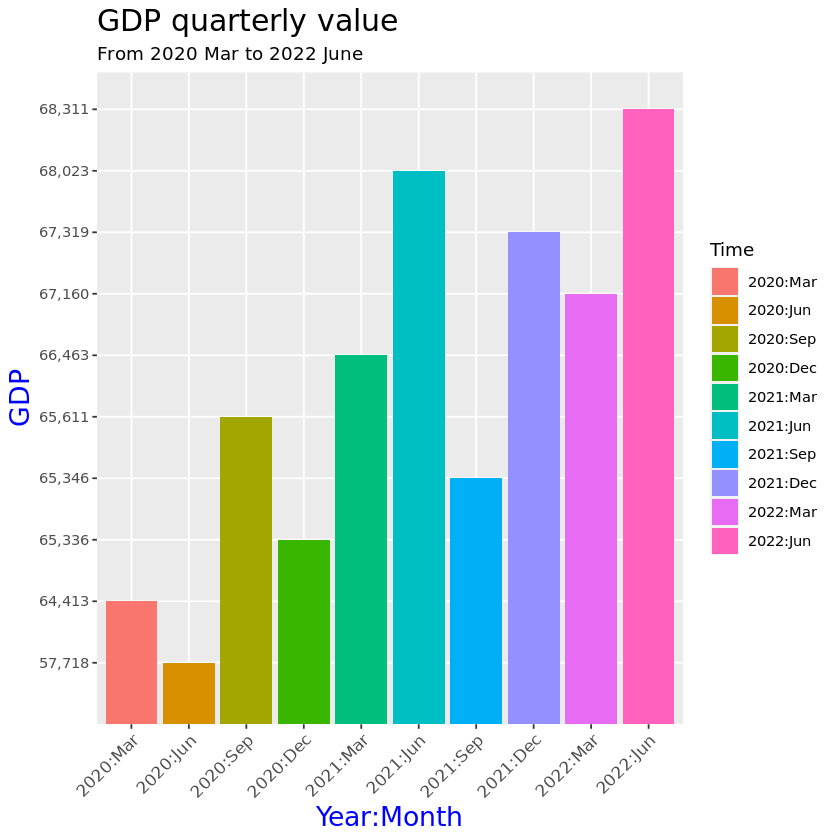

In [ ]:
gdp_graph <- gdp_change %>%
ggplot(data=.,mapping = aes(x=Time,y=gdp, fill=Time)) +
geom_col() +
labs(x="Year:Month",
     y="GDP",
     title="GDP quarterly value",
     subtitle="From 2020 Mar to 2022 June"
     ) +
theme(plot.title = element_text(color='black',size=18),
     axis.text.x = element_text(size=10, angle=45, vjust=1, hjust=1), 
     axis.title = element_text(size=16, color='blue')
     )
gdp_graph

8.Make a graph that summarizes the quarterly changes in agriculture gdp and observe the changes in agriculture gdp after the arrival of covid-19.

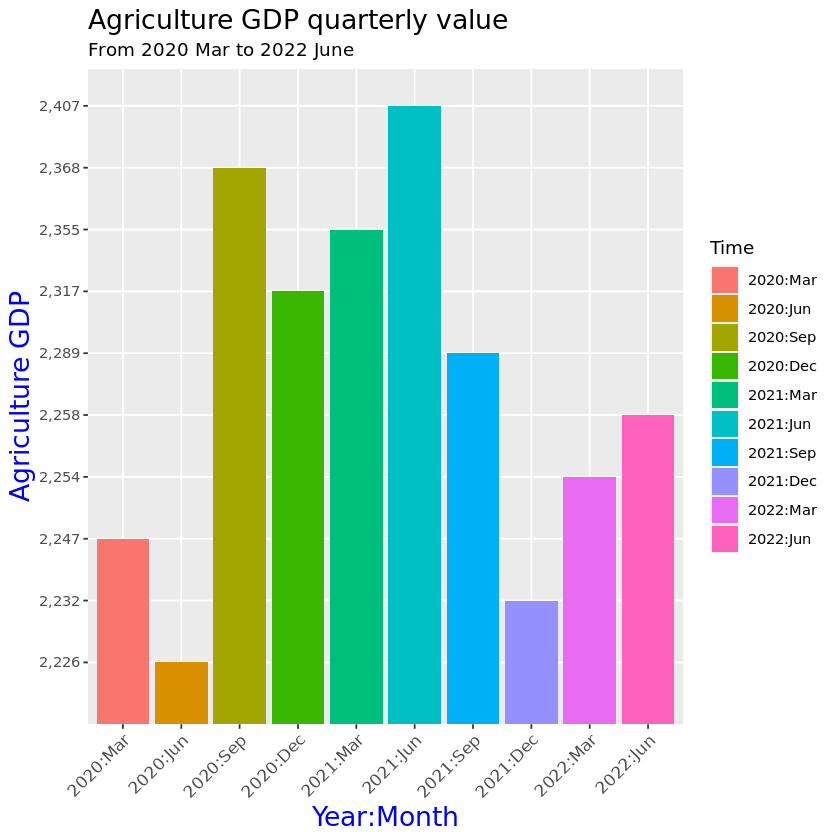

In [ ]:
gdp_agri <- gdp_change %>%
ggplot(data=.,mapping = aes(x=Time,y=Agriculture, fill=Time)) +
geom_col() +
labs(x="Year:Month",
     y="Agriculture GDP",
     title="Agriculture GDP quarterly value",
     subtitle="From 2020 Mar to 2022 June"
     ) +
theme(plot.title = element_text(color='black',size=16), 
     axis.text.x = element_text(size=10, angle=45, vjust=1, hjust=1),
     axis.title = element_text(size=16, color='blue')
     )
gdp_agri

9.Make a graph that summarizes the quarterly changes in health gdp and observe the changes in health gdp after the arrival of covid-19.

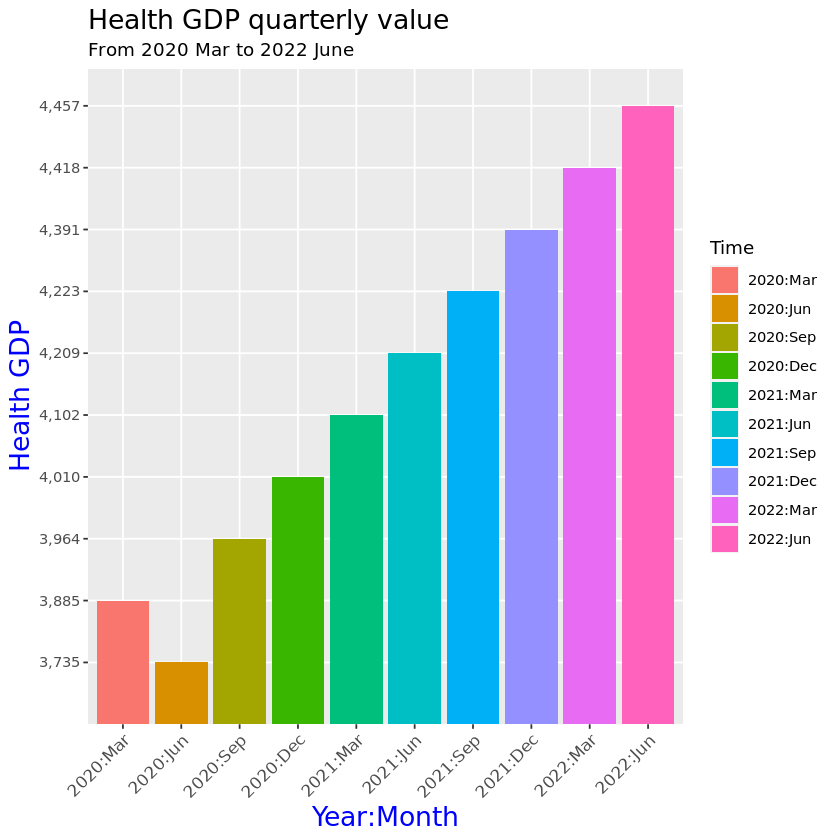

In [ ]:
gdp_health <- gdp_change %>%
ggplot(data=.,mapping = aes(x=Time,y=Health, fill=Time)) +
geom_col() +
labs(x="Year:Month",
     y="Health GDP",
     title="Health GDP quarterly value",
     subtitle="From 2020 Mar to 2022 June"
     ) +
theme(plot.title = element_text(color='black',size=16),
     axis.text.x = element_text(size=10, angle=45, vjust=1, hjust=1),
     axis.title = element_text(size=16, color='blue')
     )
gdp_health

**Comments: analyse gdp quarterly percentage change table**

1. Read the second table about GDP quarterly percentage change.

In [ ]:
percentage_df <- read.csv('GDP_quarterly_percentage_change.csv')
head(percentage_df)

,Year,X,Month,Agriculture,Forestry.and.logging,Fishing..aquaculture.and.agriculture..forestry.and.fishing.support.services,Mining,Food..beverage..and.tobacco.manufacturing,X.Textile..leather..clothing..and.footwear.manufacturing,Wood.and.paper.products.manufacturing,...,Professional..scientific..and.technical.services,Administrative.and.support.services,Local.government.administration,Central.government.administration..defence..and.public.safety,Education.and.training,Health.care.and.social.assistance,Arts.and.recreation.services,Other.services,Unallocated.industries,Gross.domestic.product
,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1987,NA,Jun,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,NA,NA,Sep,3.8,12.7,-0.6,-15.6,-4.5,-4.1,2.3,...,4.3,3.8,1.3,-0.5,0.2,-0.4,2.7,-1.4,-2.5,0.5
3,NA,NA,Dec,4.8,-1.6,3.5,43.2,-1.2,-11.4,2.2,...,0.4,2.9,2.6,-0.7,0.3,0.3,4.1,1.1,5.6,0.5
4,1988,NA,Mar,1.9,-3.6,-3.0,2.7,4.2,2.8,-6.3,...,-0.4,0.6,1.4,-0.1,0.4,-1.3,0.4,-1.4,-6.6,-0.4
5,NA,NA,Jun,-3.9,16.2,15.1,-6.1,4.2,-2.6,3.1,...,2.9,2.3,2.4,-0.6,0.5,3.9,-2.2,-3.3,-1.1,-0.5
6,NA,NA,Sep,-4.0,3.8,4.3,-5.9,-5.7,1.0,-2.1,...,-1.3,-0.4,2.8,-2.1,0.6,0.7,-5.2,1.1,1.2,0.2


2.Show the general information of the second table

In [ ]:
glimpse(percentage_df)

Rows: 141
Columns: 37
$ Year                                                                        <int> ~
$ X                                                                           <lgl> ~
$ Month                                                                       <chr> ~
$ Agriculture                                                                 <chr> ~
$ Forestry.and.logging                                                        <chr> ~
$ Fishing..aquaculture.and.agriculture..forestry.and.fishing.support.services <chr> ~
$ Mining                                                                      <chr> ~
$ Food..beverage..and.tobacco.manufacturing                                   <chr> ~
$ X.Textile..leather..clothing..and.footwear.manufacturing                    <chr> ~
$ Wood.and.paper.products.manufacturing                                       <chr> ~
$ Printing                                                                    <chr> ~
$ Petroleum..chemical..polymer..

3.Select row from 2020 to 2022, delete unnecessary columns

In [ ]:
percentage_year <- percentage_df %>%
slice(132:141) %>% # choose rows from 2020 to 2022
select(-X) # delete empty column
percentage_year

Year,Month,Agriculture,Forestry.and.logging,Fishing..aquaculture.and.agriculture..forestry.and.fishing.support.services,Mining,Food..beverage..and.tobacco.manufacturing,X.Textile..leather..clothing..and.footwear.manufacturing,Wood.and.paper.products.manufacturing,Printing,...,Professional..scientific..and.technical.services,Administrative.and.support.services,Local.government.administration,Central.government.administration..defence..and.public.safety,Education.and.training,Health.care.and.social.assistance,Arts.and.recreation.services,Other.services,Unallocated.industries,Gross.domestic.product
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2020,Mar,-0.5,-2.4,1.7,4.2,-0.4,-17.1,4.1,-4.0,...,2.0,-1.5,1.9,-0.4,-0.7,1.3,-7.0,-2.0,-1.0,-1.1
NA,Jun,-0.9,-14.1,0.6,-28.7,-4.2,-20.7,-19.9,-23.6,...,-6.9,-31.2,2.0,1.4,-7.6,-3.8,-35.2,-16.1,-16.0,-10.4
NA,Sep,6.4,26.0,7.1,16.2,10.9,68.3,27.2,20.2,...,6.1,19.9,-0.6,1.8,5.7,6.1,46.7,19.8,17.9,13.7
NA,Dec,-2.1,2.2,-2.7,-3.0,-2.2,-17.1,2.8,6.6,...,1.1,3.8,-0.4,2.0,0.7,1.2,4.3,5.5,-0.6,-0.4
2021,Mar,1.6,1.9,1.5,-0.9,0.0,14.0,1.3,-0.2,...,2.1,4.0,0.5,1.0,0.1,2.3,-4.1,1.1,7.6,1.7
NA,Jun,2.2,0.7,13.1,3.5,-1.3,-1.4,-0.3,1.8,...,3.5,4.5,-0.4,-0.2,-0.9,2.6,6.0,3.2,-2.5,2.3
NA,Sep,-4.9,-6.6,-6.7,-7.1,-1.8,-13.2,-11.7,-6.8,...,0.1,-7.1,2.0,1.3,-3.2,0.3,-16.1,-12.6,-5.2,-3.9
NA,Dec,-2.5,1.8,0.2,8.2,-2.4,19.6,15.1,5.7,...,8.7,2.3,0.6,0.7,-2.4,4.0,-2.5,8.1,3.7,3.0
2022,Mar,1.0,-0.8,-5.0,-8.8,-1.7,-10.3,-3.5,0.2,...,-1.2,6.0,0.0,0.0,3.8,0.6,0.1,0.0,1.0,-0.2


4.Display the table information after change.

In [ ]:
glimpse(percentage_year)

Rows: 10
Columns: 36
$ Year                                                                        <int> ~
$ Month                                                                       <chr> ~
$ Agriculture                                                                 <chr> ~
$ Forestry.and.logging                                                        <chr> ~
$ Fishing..aquaculture.and.agriculture..forestry.and.fishing.support.services <chr> ~
$ Mining                                                                      <chr> ~
$ Food..beverage..and.tobacco.manufacturing                                   <chr> ~
$ X.Textile..leather..clothing..and.footwear.manufacturing                    <chr> ~
$ Wood.and.paper.products.manufacturing                                       <chr> ~
$ Printing                                                                    <chr> ~
$ Petroleum..chemical..polymer..and.rubber.product.manufacturing              <chr> ~
$ Non.metallic.mineral.product.ma

5.Select columns for year, month, combined gdp, agriculture, health. Then fill in the missing years

In [ ]:
percenge_compare <- percentage_year %>%
select(Year, Month, Gross.domestic.product, Agriculture, Health.care.and.social.assistance) %>% # choose columns which needed
rename(gdp=Gross.domestic.product, Health=Health.care.and.social.assistance) %>% # change the name of column title for clear table
na.locf() #fill in empty year
percenge_compare

,Year,Month,gdp,Agriculture,Health
,<int>,<chr>,<chr>,<chr>,<chr>
1,2020,Mar,-1.1,-0.5,1.3
2,2020,Jun,-10.4,-0.9,-3.8
3,2020,Sep,13.7,6.4,6.1
4,2020,Dec,-0.4,-2.1,1.2
5,2021,Mar,1.7,1.6,2.3
6,2021,Jun,2.3,2.2,2.6
7,2021,Sep,-3.9,-4.9,0.3
8,2021,Dec,3.0,-2.5,4.0
9,2022,Mar,-0.2,1.0,0.6


6.Because the change has positive and negative values, I want the column in the chart to have positive values above x=0 and negative values below x=0, so I changed the column types of gdp, agriculture, and health to numeric.

In [ ]:
percentage_change <- percenge_compare %>%
unite(Time, Year, Month, sep=":") #merge year and month, show title time
percentage_change$Time <- factor(percentage_change$Time, levels=c("2020:Mar", "2020:Jun", "2020:Sep", "2020:Dec", "2021:Mar", "2021:Jun", "2021:Sep", "2021:Dec", "2022:Mar", "2022:Jun"))
#change the type of time to factor as showing level
percentage_change$gdp <- as.numeric(percentage_change$gdp) # change the type of gdp column
percentage_change$Agriculture <- as.numeric(percentage_change$Agriculture) # change the type of Agriculture column
percentage_change$Health <- as.numeric(percentage_change$Health) # change the type of Health column
percentage_change

,Time,gdp,Agriculture,Health
,<fct>,<dbl>,<dbl>,<dbl>
1,2020:Mar,-1.1,-0.5,1.3
2,2020:Jun,-10.4,-0.9,-3.8
3,2020:Sep,13.7,6.4,6.1
4,2020:Dec,-0.4,-2.1,1.2
5,2021:Mar,1.7,1.6,2.3
6,2021:Jun,2.3,2.2,2.6
7,2021:Sep,-3.9,-4.9,0.3
8,2021:Dec,3.0,-2.5,4.0
9,2022:Mar,-0.2,1.0,0.6


7.Make a column chart of the percent change in combined gdp seasonality from 2020 to 2022

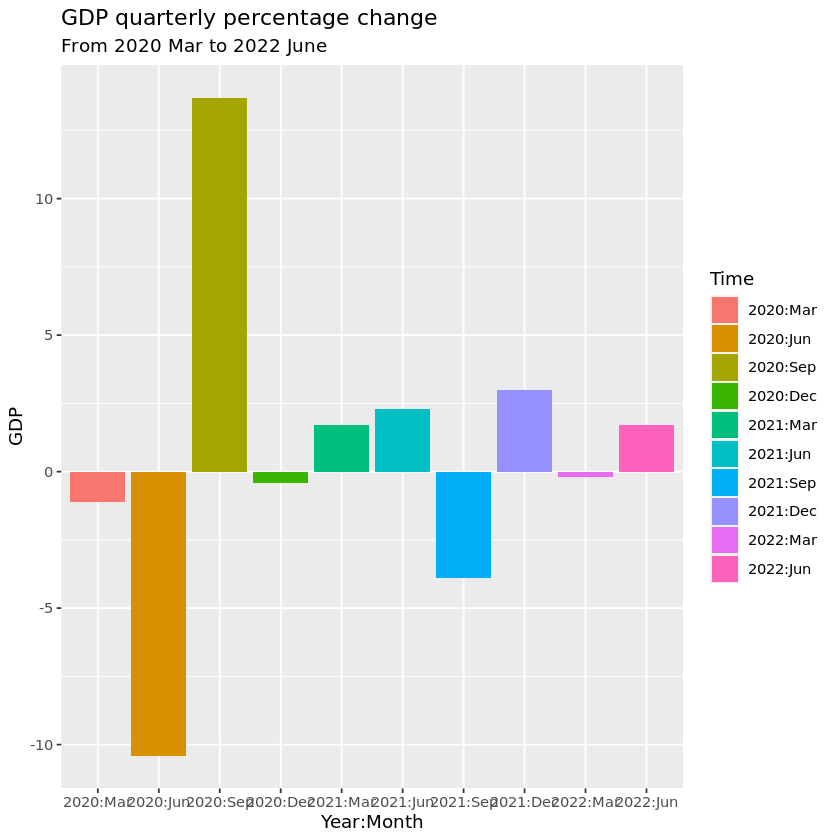

In [ ]:
percentage_graph <- percentage_change %>%
ggplot(data=.,mapping = aes(x=Time,y=gdp, fill=Time)) +
geom_col() +
labs(x="Year:Month",
     y="GDP",
     title="GDP quarterly percentage change",
     subtitle="From 2020 Mar to 2022 June"
     )
percentage_graph

8.Make a column chart of the percent change in agriculture gdp seasonality from 2020 to 2022

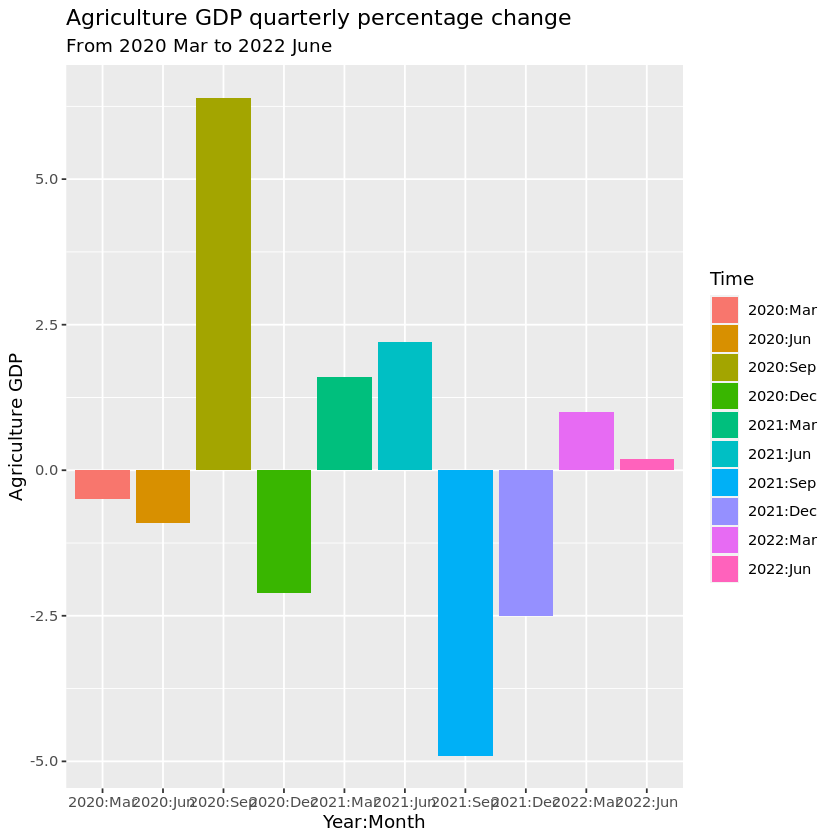

In [ ]:
percentage_agriculture <- percentage_change %>%
ggplot(data=.,mapping = aes(x=Time,y=Agriculture, fill=Time)) +
geom_col() +
labs(x="Year:Month",
     y="Agriculture GDP",
     title="Agriculture GDP quarterly percentage change",
     subtitle="From 2020 Mar to 2022 June"
     )
percentage_agriculture

8.Make a column chart of the percent change in health gdp seasonality from 2020 to 2022

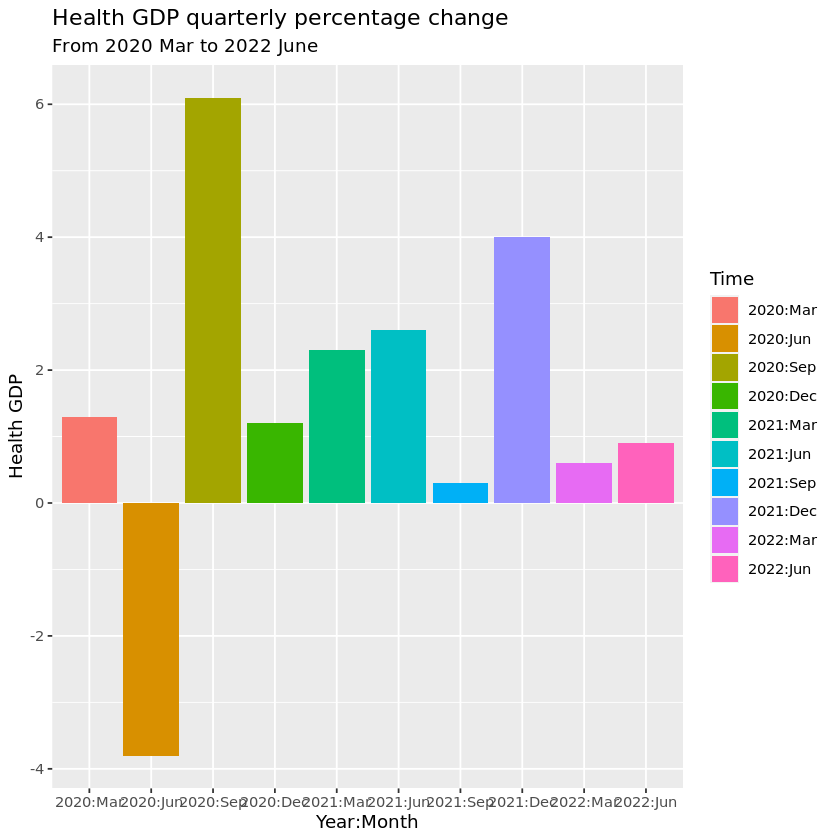

In [ ]:
percentage_health <- percentage_change %>%
ggplot(data=.,mapping = aes(x=Time,y=Health, fill=Time)) +
geom_col() +
labs(x="Year:Month",
     y="Health GDP",
     title="Health GDP quarterly percentage change",
     subtitle="From 2020 Mar to 2022 June"
     )
percentage_health

**Comments: Combine charts in pairs for easy observation of changes and trends**

1.Merge plots of combined gdp values and percentage change.

2.Merge plots of agriculture gdp values and percentage change.

2.Merge plots of health gdp values and percentage change.

**Comments: Save plots**

In [ ]:
ggsave(filename="gdp_value.png", plot=gdp_graph, height=10, width=12, units="cm")

In [ ]:
ggsave(filename="agri_value.png", plot=gdp_agri, height=10, width=12, units="cm")

In [ ]:
ggsave(filename="health_value.png", plot=gdp_health, height=10, width=12, units="cm")

In [ ]:
ggsave(filename="gdp_percentage.png", plot=percentage_graph, height=10, width=20, units="cm")

In [ ]:
ggsave(filename="agri_percentage.png", plot=percentage_agriculture, height=10, width=20, units="cm")

In [ ]:
ggsave(filename="health_percentage.png", plot=percentage_health, height=10, width=20, units="cm")

**Summarize**

1. total gdp
2. agriculture gdp
3. health gdp